C:\Users\xfont\Miniconda3\envs\candbox\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
C:\Users\xfont\Miniconda3\envs\candbox\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
C:\Users\xfont\Miniconda3\envs\candbox\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
C:\Users\xfont\Miniconda3\envs\candbox\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your cod

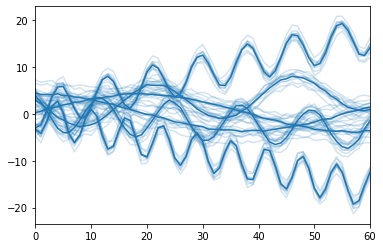

In [1]:
# from https://stackoverflow.com/questions/34940808/hierarchical-clustering-of-time-series-in-python-scipy-numpy-pandas
%matplotlib inline
import numpy as np
import seaborn as sns
import pandas as pd
from scipy import stats
import scipy.cluster.hierarchy as hac
import matplotlib.pyplot as plt

#
# build 6 time series groups for testing, called: a, b, c, d, e, f
#

num_samples = 61
group_size = 10

#
# create the main time series for each group
#

x = np.linspace(0, 5, num_samples)
scale = 4

a = scale * np.sin(x)
b = scale * (np.cos(1+x*3) + np.linspace(0, 1, num_samples))
c = scale * (np.sin(2+x*6) + np.linspace(0, -1, num_samples))
d = scale * (np.cos(3+x*9) + np.linspace(0, 4, num_samples))
e = scale * (np.sin(4+x*12) + np.linspace(0, -4, num_samples))
f = scale * np.cos(x)

#
# from each main series build 'group_size' series
#

timeSeries = pd.DataFrame()
ax = None
for arr in [a,b,c,d,e,f]:
    arr = arr + np.random.rand(group_size, num_samples) + np.random.randn(group_size, 1)
    df = pd.DataFrame(arr)
    timeSeries = timeSeries.append(df)

    # We use seaborn to plot what we have
    #ax = sns.tsplot(ax=ax, data=df.values, ci=[68, 95])
    ax = sns.tsplot(ax=ax, data=df.values, err_style="unit_traces")

plt.show()

In [ ]:
# Do the clustering
Z = hac.linkage(timeSeries, method='single', metric='correlation')

# Plot dendogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
hac.dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()


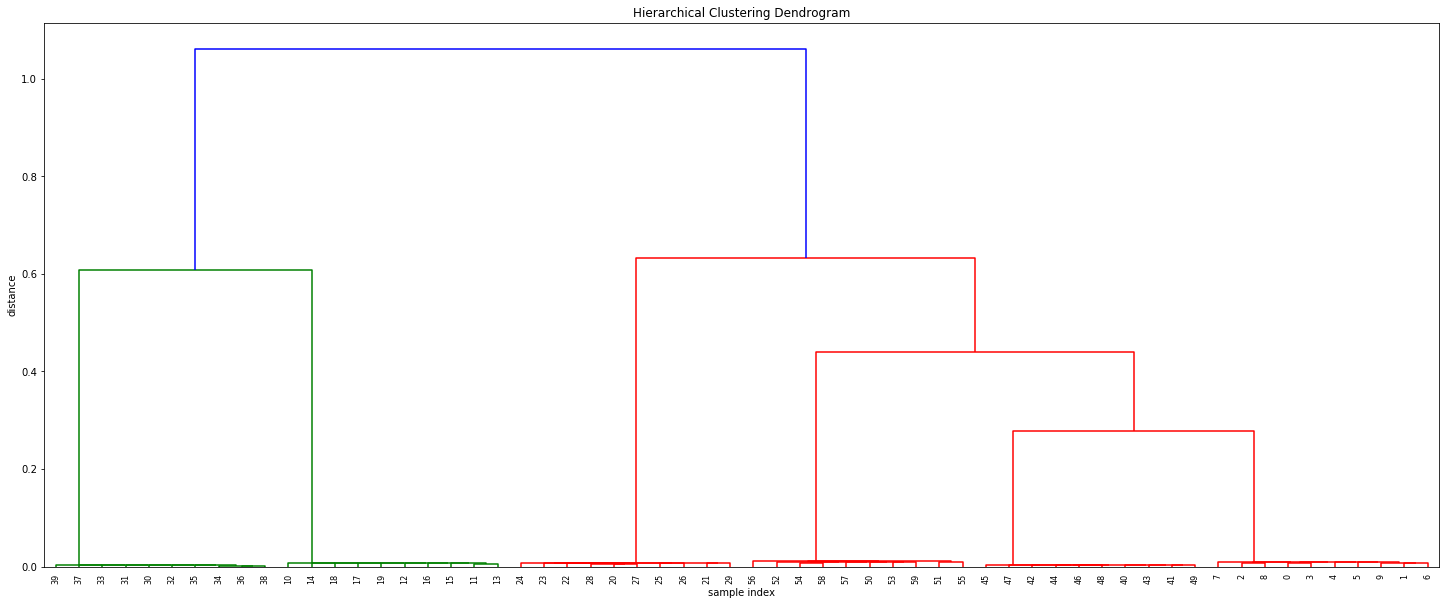

In [2]:
# Here we use spearman correlation
def my_metric(x, y):
    r = stats.pearsonr(x, y)[0]
    return 1 - r # correlation to distance: range 0 to 2

# Do the clustering    
Z = hac.linkage(timeSeries,  method='single', metric=my_metric)

# Plot dendogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
hac.dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [3]:
from scipy.cluster.hierarchy import fcluster

def print_clusters(timeSeries, Z, k, plot=False):
    # k Number of clusters I'd like to extract
    results = fcluster(Z, k, criterion='maxclust')

    # check the results
    s = pd.Series(results)
    clusters = s.unique()

    for c in clusters:
        cluster_indeces = s[s==c].index
        print("Cluster %d number of entries %d" % (c, len(cluster_indeces)))
        if plot:
            timeSeries.T.iloc[:,cluster_indeces].plot()
            plt.show()

print_clusters(timeSeries, Z, 6, plot=False)

Cluster 6 number of entries 10
Cluster 2 number of entries 10
Cluster 3 number of entries 10
Cluster 1 number of entries 10
Cluster 5 number of entries 10
Cluster 4 number of entries 10
